In [3]:
from sklearn.metrics import roc_curve, auc

In [4]:
# imports
import pandas as pd

In [5]:
import matplotlib as mpl

In [6]:
import matplotlib.pyplot as plt
import random

In [7]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant



In [8]:
# Load CSV using Pandas
filename = 'winequality-red.csv'

data1 = pd.read_csv(filename,';')
print(data1.shape)

(1599, 12)


In [9]:
data1.columns=['FA',
 'VA',
 'CA',
 'RSR',
 'CS',
 'FSD',
 'TSD',
 'DY',
 'PH',
 'SS',
 'AL',
 'quality']

In [10]:
#display the first 10 rows 
data1.head(10)

,FA,VA,CA,RSR,CS,FSD,TSD,DY,PH,SS,AL,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [11]:
#checking th mean of the quality
data1["quality"].mean()

5.6360225140712945

In [12]:
#fitting the data1 to the quality with single variable 
import statsmodels.formula.api as smf

lmdataFA=smf.ols(formula='quality ~ FA', data=data1).fit()
lmdataVA=smf.ols(formula='quality ~ VA', data=data1).fit()
lmdataCA=smf.ols(formula='quality ~ CA', data=data1).fit()
lmdataRSR=smf.ols(formula='quality ~ RSR', data=data1).fit()
lmdataCS=smf.ols(formula='quality ~ CS', data=data1).fit()
lmdataFSD=smf.ols(formula='quality ~ FSD', data=data1).fit()
lmdataTSD=smf.ols(formula='quality ~ TSD', data=data1).fit()
lmdataDY=smf.ols(formula='quality ~ DY', data=data1).fit()
lmdataPH=smf.ols(formula='quality ~ PH', data=data1).fit()
lmdataSS=smf.ols(formula='quality ~ SS', data=data1).fit()
lmdataAL=smf.ols(formula='quality ~ AL', data=data1).fit()



In [13]:
# printing the parameters of each model
print(lmdataFA.params)
print(lmdataVA.params)
print(lmdataCA.params)
print(lmdataRSR.params)
print(lmdataCS.params)
print(lmdataFSD.params)
print(lmdataTSD.params)
print(lmdataDY.params)
print(lmdataPH.params)
print(lmdataSS.params)
print(lmdataAL.params)


Intercept    5.157322
FA           0.057539
dtype: float64
Intercept    6.565746
VA          -1.761438
dtype: float64
Intercept    5.381725
CA           0.938452
dtype: float64
Intercept    5.616055
RSR          0.007865
dtype: float64
Intercept    5.829485
CS          -2.211842
dtype: float64
Intercept    5.698107
FSD         -0.003911
dtype: float64
Intercept    5.847179
TSD         -0.004544
dtype: float64
Intercept    80.238538
DY          -74.846014
dtype: float64
Intercept    6.635923
PH          -0.301983
dtype: float64
Intercept    4.847750
SS           1.197712
dtype: float64
Intercept    1.874975
AL           0.360842
dtype: float64


In [14]:
#printing the r-square of each of the models
print(lmdataFA.rsquared)
print(lmdataVA.rsquared)
print(lmdataCA.rsquared)
print(lmdataRSR.rsquared)
print(lmdataCS.rsquared)
print(lmdataFSD.rsquared)
print(lmdataTSD.rsquared)
print(lmdataDY.rsquared)
print(lmdataPH.rsquared)
print(lmdataSS.rsquared)
print(lmdataAL.rsquared)

0.0153888116477
0.152535379725
0.0512445152387
0.000188557864039
0.016616901193
0.00256603613554
0.0342621169607
0.0305967362483
0.00333291353051
0.0632004913646
0.226734368113


In [15]:
#printing the aic values of each of the models
print(lmdataFA.aic)
print(lmdataVA.aic)
print(lmdataCA.aic)
print(lmdataRSR.aic)
print(lmdataCS.aic)
print(lmdataFSD.aic)
print(lmdataTSD.aic)
print(lmdataDY.aic)
print(lmdataPH.aic)
print(lmdataSS.aic)
print(lmdataAL.aic)

3832.47061075
3592.62422735
3773.15455307
3856.96708725
3830.47495919
3853.16025456
3801.52296381
3807.58035221
3851.93039009
3752.87631975
3446.11350948


In [16]:
# adding the extra feature with low rsquare and high aic value
import statsmodels.formula.api as smf

bmdataFA=smf.ols(formula='quality ~ AL+FA', data=data1).fit()
bmdataVA=smf.ols(formula='quality ~ AL+VA', data=data1).fit()
bmdataCA=smf.ols(formula='quality ~ AL+CA', data=data1).fit()
bmdataRSR=smf.ols(formula='quality ~AL+ RSR', data=data1).fit()
bmdataCS=smf.ols(formula='quality ~ AL+CS', data=data1).fit()
bmdataFSD=smf.ols(formula='quality ~ AL+FSD', data=data1).fit()
bmdataTSD=smf.ols(formula='quality ~ AL+TSD', data=data1).fit()
bmdataDY=smf.ols(formula='quality ~ AL+DY', data=data1).fit()
bmdataPH=smf.ols(formula='quality ~ AL+PH', data=data1).fit()
bmdataSS=smf.ols(formula='quality ~ AL+SS', data=data1).fit()




In [17]:
#printing the parameters of bivariate model
print(bmdataFA.params)
print(bmdataVA.params)
print(bmdataCA.params)
print(bmdataRSR.params)
print(bmdataCS.params)
print(bmdataFSD.params)
print(bmdataTSD.params)
print(bmdataDY.params)
print(bmdataPH.params)
print(bmdataSS.params)




Intercept    1.205688
AL           0.368039
FA           0.071430
dtype: float64
Intercept    3.095471
AL           0.313813
VA          -1.383636
dtype: float64
Intercept    1.830003
AL           0.346170
CA           0.730324
dtype: float64
Intercept    1.882059
AL           0.361043
RSR         -0.003617
dtype: float64
Intercept    1.955580
AL           0.356682
CS          -0.425886
dtype: float64
Intercept    1.906357
AL           0.359911
FSD         -0.001366
dtype: float64
Intercept    2.126671
AL           0.346656
TSD         -0.002235
dtype: float64
Intercept   -33.152380
AL            0.391441
DY           34.821702
dtype: float64
Intercept    4.425814
AL           0.386167
PH          -0.850108
dtype: float64
Intercept    1.374967
AL           0.346042
SS           0.994095
dtype: float64


In [18]:
#printing the r square model
print(bmdataFA.rsquared)
print(bmdataVA.rsquared)
print(bmdataCA.rsquared)
print(bmdataRSR.rsquared)
print(bmdataCS.rsquared)
print(bmdataFSD.rsquared)
print(bmdataTSD.rsquared)
print(bmdataDY.rsquared)
print(bmdataPH.rsquared)
print(bmdataSS.rsquared)


0.250360688361
0.317002432797
0.257394728455
0.226774169774
0.227320307137
0.227045844706
0.234669416319
0.231726627166
0.252029866297
0.269891240173


In [19]:
#printing the bivariate aic values
print(bmdataFA.aic)
print(bmdataVA.aic)
print(bmdataCA.aic)
print(bmdataRSR.aic)
print(bmdataCS.aic)
print(bmdataFSD.aic)
print(bmdataTSD.aic)
print(bmdataDY.aic)
print(bmdataPH.aic)
print(bmdataSS.aic)


3398.4958133
3249.62751353
3383.42118874
3448.03120336
3446.90141416
3447.46929178
3431.62022235
3437.75678142
3394.93144392
3356.28434968


In [20]:
#adding an extra feature
import statsmodels.formula.api as smf

tmdataFA=smf.ols(formula='quality ~ AL+VA+FA', data=data1).fit()
tmdataCA=smf.ols(formula='quality ~ AL+VA+CA', data=data1).fit()
tmdataRSR=smf.ols(formula='quality ~AL+VA+ RSR', data=data1).fit()
tmdataCS=smf.ols(formula='quality ~ AL+VA+CS', data=data1).fit()
tmdataFSD=smf.ols(formula='quality ~ AL+VA+FSD', data=data1).fit()
tmdataTSD=smf.ols(formula='quality ~ AL+VA+TSD', data=data1).fit()
tmdataDY=smf.ols(formula='quality ~ AL+VA+DY', data=data1).fit()
tmdataPH=smf.ols(formula='quality ~ AL+VA+PH', data=data1).fit()
tmdataSS=smf.ols(formula='quality ~ AL+VA+SS', data=data1).fit()




In [21]:
#printing parameters of 3 -feature model
print(tmdataFA.params)
print(tmdataCA.params)
print(tmdataRSR.params)
print(tmdataCS.params)
print(tmdataFSD.params)
print(tmdataTSD.params)
print(tmdataDY.params)
print(tmdataPH.params)
print(tmdataSS.params)



Intercept    2.674469
AL           0.320726
VA          -1.286244
FA           0.035763
dtype: float64
Intercept    3.055327
AL           0.313837
VA          -1.342858
CA           0.067794
dtype: float64
Intercept    3.098825
AL           0.313917
VA          -1.383483
RSR         -0.001781
dtype: float64
Intercept    3.157406
AL           0.310599
VA          -1.382118
CS          -0.334311
dtype: float64
Intercept    3.142876
AL           0.312384
VA          -1.386553
FSD         -0.001951
dtype: float64
Intercept    3.305009
AL           0.301797
VA          -1.370525
TSD         -0.001963
dtype: float64
Intercept   -18.406540
AL            0.333207
VA           -1.365245
DY           21.359641
dtype: float64
Intercept    4.268812
AL           0.329945
VA          -1.278759
PH          -0.421865
dtype: float64
Intercept    2.610832
AL           0.309218
VA          -1.221404
SS           0.679028
dtype: float64


In [22]:
#printing r square of all the 3-feature models
print(tmdataFA.rsquared)
print(tmdataCA.rsquared)
print(tmdataRSR.rsquared)
print(tmdataCS.rsquared)
print(tmdataFSD.rsquared)
print(tmdataTSD.rsquared)
print(tmdataDY.rsquared)
print(tmdataPH.rsquared)
print(tmdataSS.rsquared)


0.322477669213
0.317188225412
0.31701208389
0.317363374831
0.317637713781
0.323117623302
0.318864872089
0.322713162414
0.335897315653


In [23]:
#aic values
print(tmdataFA.aic)
print(tmdataCA.aic)
print(tmdataRSR.aic)
print(tmdataCS.aic)
print(tmdataFSD.aic)
print(tmdataTSD.aic)
print(tmdataDY.aic)
print(tmdataPH.aic)
print(tmdataSS.aic)

3238.75750655
3251.19248591
3251.60491871
3250.78227059
3250.1395331
3237.24645648
3247.26130738
3238.20162954
3206.76834402


In [24]:
#adding an extra feature based on the lowest r-square value
import statsmodels.formula.api as smf

fmdataFA=smf.ols(formula='quality ~ AL+VA+SS+FA', data=data1).fit()
fmdataCA=smf.ols(formula='quality ~ AL+VA+SS+CA', data=data1).fit()
fmdataRSR=smf.ols(formula='quality ~AL+VA+SS+ RSR', data=data1).fit()
fmdataCS=smf.ols(formula='quality ~ AL+VA+SS+CS', data=data1).fit()
fmdataFSD=smf.ols(formula='quality ~ AL+VA+SS+FSD', data=data1).fit()
fmdataTSD=smf.ols(formula='quality ~ AL+VA+SS+TSD', data=data1).fit()
fmdataDY=smf.ols(formula='quality ~ AL+VA+SS+DY', data=data1).fit()
fmdataPH=smf.ols(formula='quality ~ AL+VA+SS+PH', data=data1).fit()





In [25]:
#printing the paramters of four feature model
print(fmdataFA.params)
print(fmdataCA.params)
print(fmdataRSR.params)
print(fmdataCS.params)
print(fmdataFSD.params)
print(fmdataTSD.params)
print(fmdataDY.params)
print(fmdataPH.params)




Intercept    2.312792
AL           0.314793
VA          -1.155175
SS           0.642221
FA           0.027549
dtype: float64
Intercept    2.645918
AL           0.309078
VA          -1.265058
SS           0.695516
CA          -0.079125
dtype: float64
Intercept    2.614778
AL           0.309342
VA          -1.221203
SS           0.679109
RSR         -0.002126
dtype: float64
Intercept    2.776759
AL           0.292088
VA          -1.167459
SS           0.873565
CS          -1.645106
dtype: float64
Intercept    2.666149
AL           0.307304
VA          -1.223105
SS           0.687762
FSD         -0.002534
dtype: float64
Intercept    2.825813
AL           0.295310
VA          -1.198563
SS           0.712140
TSD         -0.002235
dtype: float64
Intercept   -4.819822
AL           0.316035
VA          -1.218743
SS           0.663527
DY           7.392444
dtype: float64
Intercept    3.492573
AL           0.321208
VA          -1.155835
SS           0.635280
PH          -0.305797
dtype: float64


In [26]:
# printing the rsquare values of the 4-feature model
print(fmdataFA.rsquared)
print(fmdataCA.rsquared)
print(fmdataRSR.rsquared)
print(fmdataCS.rsquared)
print(fmdataFSD.rsquared)
print(fmdataTSD.rsquared)
print(fmdataDY.rsquared)
print(fmdataPH.rsquared)



0.339090845082
0.33613926635
0.335911071296
0.343086709932
0.33696518852
0.343782425784
0.336110553787
0.338819501046


In [27]:
#aic values
print(fmdataFA.aic)
print(fmdataCA.aic)
print(fmdataRSR.aic)
print(fmdataCS.aic)
print(fmdataFSD.aic)
print(fmdataTSD.aic)
print(fmdataDY.aic)
print(fmdataPH.aic)


3201.06054354
3208.18567862
3208.73522339
3191.36362648
3206.19509281
3189.66927935
3208.25483529
3201.71689709


In [28]:
#5-feature model fitting by adding an extra feature
import statsmodels.formula.api as smf

vmdataFA=smf.ols(formula='quality ~ AL+VA+SS+TSD+FA', data=data1).fit()
vmdataCA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CA', data=data1).fit()
vmdataRSR=smf.ols(formula='quality ~AL+VA+SS+TSD+ RSR', data=data1).fit()
vmdataCS=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS', data=data1).fit()
vmdataFSD=smf.ols(formula='quality ~ AL+VA+SS+TSD+FSD', data=data1).fit()
vmdataDY=smf.ols(formula='quality ~ AL+VA+SS+TSD+DY', data=data1).fit()
vmdataPH=smf.ols(formula='quality ~ AL+VA+SS+TSD+PH', data=data1).fit()





In [29]:
#printing parameters
print(vmdataFA.params)
print(vmdataCA.params)
print(vmdataRSR.params)
print(vmdataCS.params)
print(vmdataFSD.params)
print(vmdataDY.params)
print(vmdataPH.params)




Intercept    2.571841
AL           0.300743
VA          -1.146997
SS           0.680322
TSD         -0.002081
FA           0.022105
dtype: float64
Intercept    2.843107
AL           0.295342
VA          -1.222310
SS           0.720788
TSD         -0.002218
CA          -0.042725
dtype: float64
Intercept    2.817021
AL           0.294214
VA          -1.198540
SS           0.713102
TSD         -0.002324
RSR          0.009336
dtype: float64
Intercept    3.004892
AL           0.277098
VA          -1.141902
SS           0.914832
TSD         -0.002310
CS          -1.704787
dtype: float64
Intercept    2.822338
AL           0.293061
VA          -1.187670
SS           0.711287
TSD         -0.003054
FSD          0.003765
dtype: float64
Intercept   -2.355402
AL           0.300143
VA          -1.196839
SS           0.701143
TSD         -0.002223
DY           5.153343
dtype: float64
Intercept    3.748772
AL           0.307587
VA          -1.129817
SS           0.667059
TSD         -0.002272
PH      

In [30]:
# printing the rsquare values
print(vmdataFA.rsquared)
print(vmdataCA.rsquared)
print(vmdataRSR.rsquared)
print(vmdataCS.rsquared)
print(vmdataFSD.rsquared)
print(vmdataDY.rsquared)
print(vmdataPH.rsquared)



0.345800976962
0.343852503778
0.344035160879
0.351494238502
0.345083252271
0.343885791282
0.34695788821


In [31]:
#printing the aic values
print(vmdataFA.aic)
print(vmdataCA.aic)
print(vmdataRSR.aic)
print(vmdataCS.aic)
print(vmdataFSD.aic)
print(vmdataDY.aic)
print(vmdataPH.aic)



3186.74311176
3191.49851176
3191.05332319
3172.76667862
3188.49642025
3191.41738965
3183.91287407


In [32]:
#six feature model
import statsmodels.formula.api as smf

smdataFA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+FA', data=data1).fit()
smdataCA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+CA', data=data1).fit()
smdataRSR=smf.ols(formula='quality ~AL+VA+SS+TSD+CS+ RSR', data=data1).fit()
smdataFSD=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+FSD', data=data1).fit()
smdataDY=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+DY', data=data1).fit()
smdataPH=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH', data=data1).fit()





In [33]:
#printing the parameters of these models
print(smdataFA.params)
print(smdataCA.params)
print(smdataRSR.params)
print(smdataFSD.params)
print(smdataDY.params)
print(smdataPH.params)




Intercept    2.736541
AL           0.282560
VA          -1.085621
SS           0.884692
TSD         -0.002146
CS          -1.737688
FA           0.023658
dtype: float64
Intercept    2.984530
AL           0.276431
VA          -1.103656
SS           0.908496
TSD         -0.002338
CS          -1.762748
CA           0.065345
dtype: float64
Intercept    2.995903
AL           0.275118
VA          -1.140669
SS           0.920523
TSD         -0.002440
CS          -1.740881
RSR          0.013573
dtype: float64
Intercept    3.000307
AL           0.275075
VA          -1.131880
SS           0.912589
TSD         -0.003092
CS          -1.692779
FSD          0.003602
dtype: float64
Intercept   -3.162450
AL           0.282795
VA          -1.139678
SS           0.902356
TSD         -0.002295
CS          -1.709951
DY           6.134706
dtype: float64
Intercept    4.295732
AL           0.290674
VA          -1.038195
SS           0.888680
TSD         -0.002372
CS          -2.002284
PH          -0.435183
d

In [34]:
# printing the rsquare values of each of the models
print(smdataFA.rsquared)
print(smdataCA.rsquared)
print(smdataRSR.rsquared)
print(smdataFSD.rsquared)
print(smdataDY.rsquared)
print(smdataPH.rsquared)



0.353803374576
0.351649250286
0.352024937791
0.352684364619
0.351640649965
0.357173648009


In [35]:
#aic values

print(smdataFA.aic)
print(smdataCA.aic)
print(smdataRSR.aic)
print(smdataFSD.aic)
print(smdataDY.aic)
print(smdataPH.aic)



3169.06295468
3174.38442532
3173.45761458
3171.82952663
3174.40563578
3160.70145983


In [36]:
#adding the 7th feature based on the r-square values of the 6 feature model
import statsmodels.formula.api as smf

nmdataFA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FA', data=data1).fit()
nmdataCA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+CA', data=data1).fit()
nmdataRSR=smf.ols(formula='quality ~AL+VA+SS+TSD+CS+PH+ RSR', data=data1).fit()
nmdataFSD=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD', data=data1).fit()
nmdataDY=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+DY', data=data1).fit()





In [37]:
#printing the parameters
print(nmdataFA.params)
print(nmdataCA.params)
print(nmdataRSR.params)
print(nmdataFSD.params)
print(nmdataDY.params)





Intercept    4.368150
AL           0.290703
VA          -1.039261
SS           0.890359
TSD         -0.002389
CS          -2.010594
PH          -0.451596
FA          -0.002092
dtype: float64
Intercept    4.613483
AL           0.295174
VA          -1.114633
SS           0.899497
TSD         -0.002311
CS          -1.915329
PH          -0.524756
CA          -0.167068
dtype: float64
Intercept    4.264430
AL           0.288988
VA          -1.039303
SS           0.893276
TSD         -0.002465
CS          -2.022519
PH          -0.426810
RSR          0.009762
dtype: float64
Intercept    4.430099
AL           0.289303
VA          -1.012753
SS           0.882665
TSD         -0.003482
CS          -2.017814
PH          -0.482661
FSD          0.005077
dtype: float64
Intercept    7.766191
AL           0.287792
VA          -1.037161
SS           0.895070
TSD         -0.002382
CS          -2.005928
PH          -0.444730
DY          -3.423927
dtype: float64


In [38]:
#printing the rsquare valuesof the 7 feature model
print(nmdataFA.rsquared)
print(nmdataCA.rsquared)
print(nmdataRSR.rsquared)
print(nmdataFSD.rsquared)
print(nmdataDY.rsquared)




0.357183630747
0.357946316503
0.357446060517
0.359470915872
0.357216522373


In [39]:
#printing the aic values
print(nmdataFA.aic)
print(nmdataCA.aic)
print(nmdataRSR.aic)
print(nmdataFSD.aic)
print(nmdataDY.aic)




3162.67662805
3160.77832765
3162.02370304
3156.97688013
3162.59480833


In [40]:
#8-feature model
import statsmodels.formula.api as smf

emdataFA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD+FA', data=data1).fit()
emdataCA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD+CA', data=data1).fit()
emdataRSR=smf.ols(formula='quality ~AL+VA+SS+TSD+CS+PH+FSD+ RSR', data=data1).fit()
emdataDY=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD+DY', data=data1).fit()





In [41]:
#printing the parameters
print(emdataFA.params)
print(emdataCA.params)
print(emdataRSR.params)
print(emdataDY.params)





Intercept    4.487827
AL           0.289327
VA          -1.013622
SS           0.884010
TSD         -0.003495
CS          -2.024438
PH          -0.495733
FSD          0.005074
FA          -0.001671
dtype: float64
Intercept    4.668088
AL           0.292878
VA          -1.073612
SS           0.891428
TSD         -0.003366
CS          -1.949419
PH          -0.549150
FSD          0.004760
CA          -0.129544
dtype: float64
Intercept    4.403138
AL           0.288036
VA          -1.014153
SS           0.886328
TSD         -0.003530
CS          -2.033038
PH          -0.475201
FSD          0.004968
RSR          0.007506
dtype: float64
Intercept    7.311265
AL           0.286913
VA          -1.011961
SS           0.887986
TSD         -0.003487
CS          -2.020798
PH          -0.490463
FSD          0.005064
DY          -2.842884
dtype: float64


In [42]:
#printing the r-square values
print(emdataFA.rsquared)
print(emdataCA.rsquared)
print(emdataRSR.rsquared)
print(emdataDY.rsquared)




0.359477278853
0.359926509089
0.359630898729
0.35950045737


In [43]:
#printing the aic values
print(emdataFA.aic)
print(emdataCA.aic)
print(emdataRSR.aic)
print(emdataDY.aic)




3158.96099567
3157.83914451
3158.57745324
3158.90313181


In [44]:
#checking the 9-feature model
import statsmodels.formula.api as smf

imdataFA=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD+CA+FA', data=data1).fit()
imdataRSR=smf.ols(formula='quality ~AL+VA+SS+TSD+CS+PH+FSD+CA+ RSR', data=data1).fit()
imdataDY=smf.ols(formula='quality ~ AL+VA+SS+TSD+CS+PH+FSD+CA+DY', data=data1).fit()





In [45]:
# printing the paramters
print(imdataFA.params)
print(imdataRSR.params)
print(imdataDY.params)





Intercept    4.441092
AL           0.294021
VA          -1.090580
SS           0.887285
TSD         -0.003256
CS          -1.889307
PH          -0.502233
FSD          0.004666
CA          -0.175650
FA           0.009020
dtype: float64
Intercept    4.658318
AL           0.291653
VA          -1.081502
SS           0.896900
TSD         -0.003413
CS          -1.961589
PH          -0.546511
FSD          0.004591
CA          -0.142606
RSR          0.009400
dtype: float64
Intercept    1.580688
AL           0.295926
VA          -1.082343
SS           0.886803
TSD         -0.003345
CS          -1.937339
PH          -0.549310
FSD          0.004734
CA          -0.146306
DY           3.076761
dtype: float64


In [46]:
#printing the r-sqaure values
print(imdataFA.rsquared)
print(imdataRSR.rsquared)
print(imdataDY.rsquared)




0.360054301222
0.360172804471
0.359953484268


In [47]:
#printing the aic values
print(imdataFA.aic)
print(imdataRSR.aic)
print(imdataDY.aic)




3159.51986863
3159.22374313
3159.77175503


#### The AIC Value of k+1 feature model is higher than the kfeature model at k=8 and therefore k=8 is the best regression model found with the attributes Alcohol,Volatile acidity,sulphates,total sulphur dioxide,chlorides,pH,free sulphur dioxide,citric acid

In [48]:
The coefficients included for each of the attrbutes are as mentioned
AL           0.292878
VA          -1.073612
SS           0.891428
TSD         -0.003366
CS          -1.949419
PH          -0.549150
FSD          0.004760
CA          -0.129544

SyntaxError: invalid syntax (<ipython-input-48-f72ede9dc8f7>, line 1)

In [49]:
The pvalues of the model are shown below

SyntaxError: invalid syntax (<ipython-input-49-9c77177ecc41>, line 1)

In [50]:
emdataCA.pvalues

Intercept    2.062458e-23
AL           2.637410e-60
VA           6.385546e-20
SS           1.188422e-15
TSD          1.424683e-06
CS           1.417497e-06
PH           3.903038e-05
FSD          2.670413e-02
CA           2.875672e-01
dtype: float64

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
datatest=data1[data1.columns[1:11]]

In [111]:
print(datatest)

         VA    CA   RSR     CS   FSD    TSD       DY    PH    SS    AL
0     0.700  0.00   1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4
1     0.880  0.00   2.6  0.098  25.0   67.0  0.99680  3.20  0.68   9.8
2     0.760  0.04   2.3  0.092  15.0   54.0  0.99700  3.26  0.65   9.8
3     0.280  0.56   1.9  0.075  17.0   60.0  0.99800  3.16  0.58   9.8
4     0.700  0.00   1.9  0.076  11.0   34.0  0.99780  3.51  0.56   9.4
5     0.660  0.00   1.8  0.075  13.0   40.0  0.99780  3.51  0.56   9.4
6     0.600  0.06   1.6  0.069  15.0   59.0  0.99640  3.30  0.46   9.4
7     0.650  0.00   1.2  0.065  15.0   21.0  0.99460  3.39  0.47  10.0
8     0.580  0.02   2.0  0.073   9.0   18.0  0.99680  3.36  0.57   9.5
9     0.500  0.36   6.1  0.071  17.0  102.0  0.99780  3.35  0.80  10.5
10    0.580  0.08   1.8  0.097  15.0   65.0  0.99590  3.28  0.54   9.2
11    0.500  0.36   6.1  0.071  17.0  102.0  0.99780  3.35  0.80  10.5
12    0.615  0.00   1.6  0.089  16.0   59.0  0.99430  3.58  0.52   9.9
13    

In [117]:
datatestquality = emdataCA.predict(datatest)
print(datatestquality)

0       5.031063
1       5.144855
2       5.216666
3       5.679617
4       5.031063
5       5.065283
6       5.105372
7       5.330380
8       5.328061
9       5.632555
10      5.073196
11      5.632555
12      5.108975
13      5.964204
14      5.139137
15      5.173760
16      5.867106
17      5.357820
18      5.013084
19      5.473953
20      5.519593
21      5.407215
22      5.748393
23      5.266053
24      5.539068
25      5.436450
26      5.529950
27      5.748393
28      5.036496
29      5.340003
          ...   
1569    5.915375
1570    6.347281
1571    6.096455
1572    4.976191
1573    6.068663
1574    5.531280
1575    6.167077
1576    6.131243
1577    5.796090
1578    5.722555
1579    5.858811
1580    6.247304
1581    5.858811
1582    5.725683
1583    5.409096
1584    6.452247
1585    6.311583
1586    6.377700
1587    5.692942
1588    6.251157
1589    4.962792
1590    6.219202
1591    5.558312
1592    5.971096
1593    5.500126
1594    5.540017
1595    5.982482
1596    5.9710

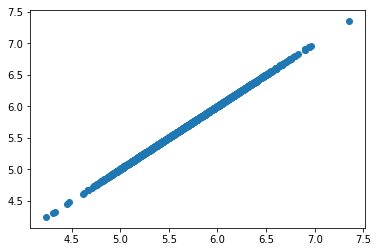

In [118]:
#plotting the data for finding the noise points
plt.scatter(data1.quality,datatestquality)
plt.show()